In [1]:
# Charge the libraries :
library(repr) # to resize figure in the notebook
library(GoFKernel)#Function to calculate the inverse function of a cumulative distribution function.

Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


## Exercise 1: 
Given a set of measurement let's evaluate the expected values, E[X], and the variance,Var(X), for two methods p1 and p2. 
They are defined as : 

$
E[X] = \sum^n_i x_i * p(x_i) \\
var(X) = E[X^2]-E[X]^2
$

In [18]:
data  <- c(15.58, 15.9, 16, 16.1, 16.2) #data=x 
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

#p1 and p2 have some one :
cat("The sum of p1 is: ",sum(p1))
cat("\nThe sum of p2 is: ",sum(p2))
#so I can evaluate the expected value as the weighed average and the variance,
#using the function of r as :
mean_1 <- weighted.mean(data, p1)
mean_2 <- weighted.mean(data, p2)

var_1  <- sum(p1*data*data)-mean_1^2
var_2  <- sum(p2*data*data)-mean_2^2
cat("\nFor the first model we get: E[X]= ", mean_1," var(X)= ", var_1 )
cat("\nFor the second model we get: E[X]= ", mean_2," var(X)= ", var_2 )



The sum of p1 is:  1
The sum of p2 is:  1
For the first model we get: E[X]=  15.959  var(X)=  0.033979
For the second model we get: E[X]=  15.9622  var(X)=  0.02816716

## Exercise 2
* The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30
#### 1. Simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram. 


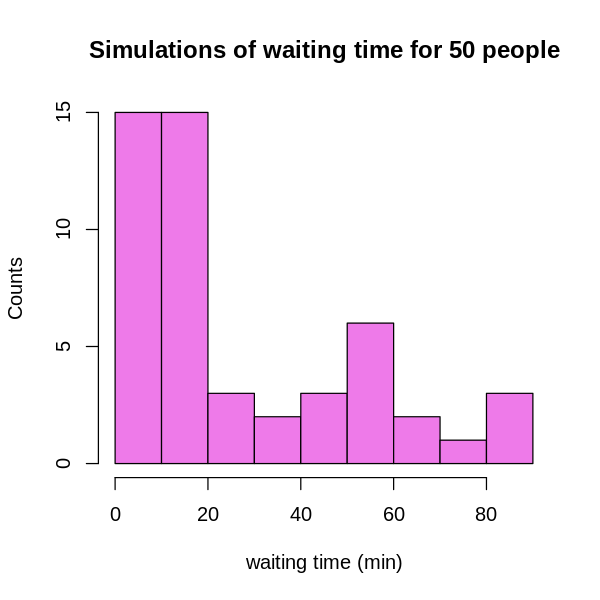

In [3]:
options(repr.plot.width=5, repr.plot.height=5) # fix the figure size on the jupyter 

rate=1/30
##################1
waiting_min<-rexp(50,rate) #exponential distribution

hist(waiting_min, col="orchid2", breaks=7,
     xlab="waiting time (min)", ylab="Counts", main="Simulations of waiting time for 50 people")



#### 2. What is the probability that a person will wait for less than 10 minutes ?
We can compute it experimentally as the ratio of the number of simulated values smaller than 10 over the whoole number of simulated data. 
This can be obtained in an other way noticing that it' s the cumulative distribution function in position 10.

In [4]:
prob_less10_50 <- length(waiting_min[waiting_min<10])/length(waiting_min)#number of events under 10 min
#if I increase the number of samples I get a better result
sample <- rexp(100000, rate) 
prob_less10_100k <- length(sample[sample<10]) /length(sample)
cat("The probability of waiting less than 10 min estimated from a set of 50 sample is :", prob_less10_50) 
cat("\nThe probability of waiting less than 10 min estimated from a set of 100k sample is :", prob_less10_100k) 

# Let' s compare it with the cumulative distrib result : 
cat("\nThe probability of waiting less than 10 min estimated from the CDF is :", pexp(q=10,rate))

The probability of waiting less than 10 min estimated from a set of 50 sample is : 0.3
The probability of waiting less than 10 min estimated from a set of 100k sample is : 0.28532
The probability of waiting less than 10 min estimated from the CDF is : 0.2834687

#### 3. Evaluate  the  average  waiting  time  from  the  simulated  data  and  compare  it  with the  expected  value  (calculated  from  theory  and  by  manipulating  the  probability distributions using R)
The expected value of an exponantial distribution is 1/rate. 

In [5]:
cat("The expected value from theory is :", 1/rate)
cat("\nThe mean value on a population of 50 individuals is :", mean(waiting_min))
cat("\nThe mean value on a population of 100k individuals is :", mean(sample))
#let' s manipulate the probability distrib in R to get the expected value from theory:
#we can simply evaluate the integral of the exponantial density function :
mean_distr<-integrate(function(x) x*dexp(x, rate=rate), lower=0, upper=Inf)$value #the $value indicates the final estimate of the integral.

cat("\nThe expected value obtained by integration in R is :", mean_distr)
                      


The expected value from theory is : 30
The mean value on a population of 50 individuals is : 27.16056
The mean value on a population of 100k individuals is : 29.99438
The expected value obtained by integration in R is : 30

#### 4. What is the probability for waiting more than one hour before being received ?
The probability to wait more than one hour is equal to 1 minus the probability to wait less than an hour, that is easier to compute:

In [6]:
#here I could calculate also the prob as: 
#prob_less60_50<-length(waiting_min[waiting_min>60])/length(waiting_min)
prob_less60_50 <-1- length(waiting_min[waiting_min<=60])/length(waiting_min)#number of events under 60 min
#if I increase the number of samples I get a better result
sample <- rexp(100000, rate) 
prob_less60_100k <-1- length(sample[sample<=60]) /length(sample)
cat("The probability of waiting less than 10 min estimated from a set of 50 sample is :",prob_less60_50) 
cat("\nThe probability of waiting less than 10 min estimated from a set of 100k sample is :", prob_less60_100k) 

# Let' s compare it with the cumulative distrib result : 
cat("\nThe probability of waiting less than 10 min estimated from the CDF is :", 1-pexp(q=60,rate))

The probability of waiting less than 10 min estimated from a set of 50 sample is : 0.12
The probability of waiting less than 10 min estimated from a set of 100k sample is : 0.13631
The probability of waiting less than 10 min estimated from the CDF is : 0.1353353

## Exercise 3

Let’s suppose that on a book, on average, there is one typo error every three pages. If the number of errors follows a Poisson distribution, plot the pdf and  cdf,  and calculate the probability that there is at least one error on a specific page of the book

##### solution: 
Assuming that on one single page on average I have 1/3 probability to find an error, and the error follows a poissonian distribution. The probability that there is at least one error is computed as 1 minus the probability to do not make any error:

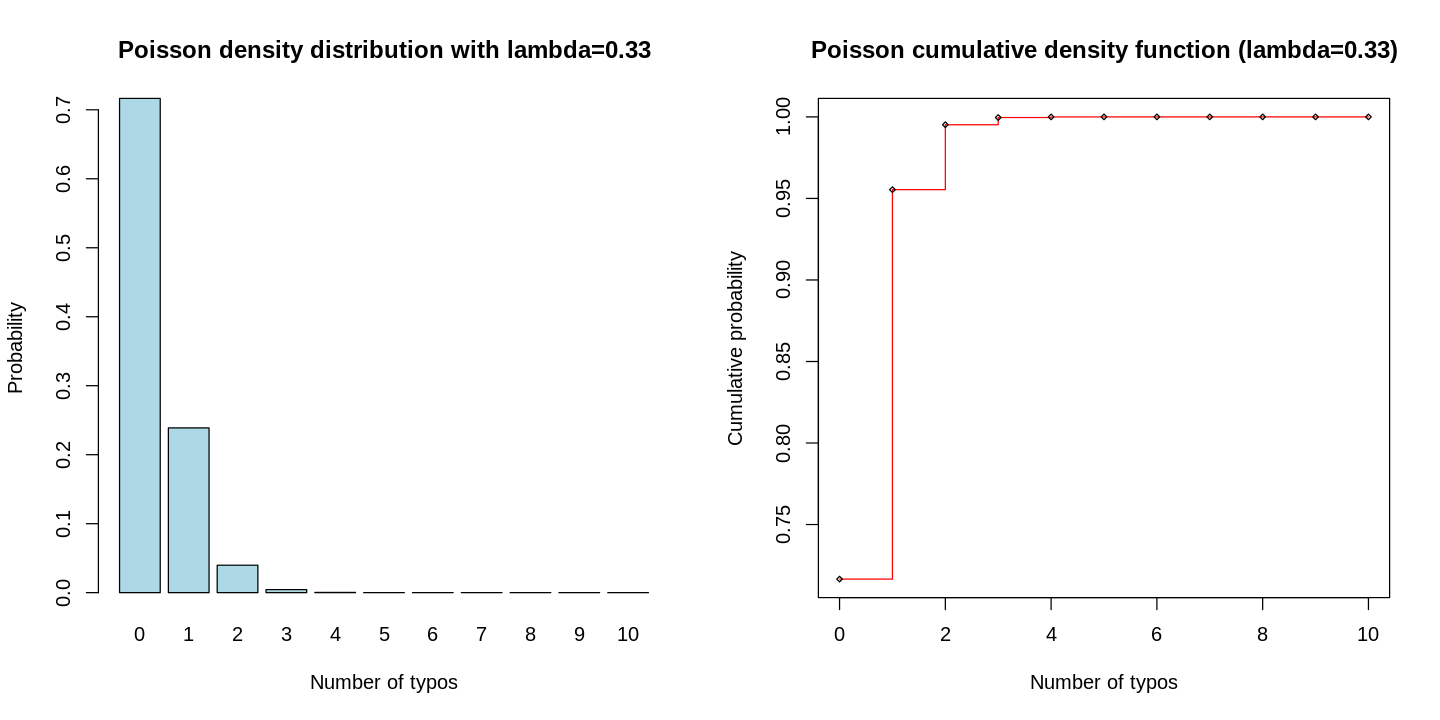

In [7]:
##PLOT
par(mfrow=c(1,2))   #to make two plot one near to the other
options(repr.plot.width=12, repr.plot.height=6) 
        
lambda <- 1/3
x<-0:10
pdf<-dpois(x=x,lambda=lambda)
cdf<-ppois(x,lambda)

barplot(names=x,pdf,xlab="Number of typos",ylab="Probability",
    main=sprintf("Poisson density distribution with lambda=%.2f",lambda),
       col="lightblue")

plot(y=cdf, x=x,xlab="Number of typos",ylab="Cumulative probability",
    main=sprintf("Poisson cumulative density function (lambda=%.2f)",lambda),
       col="red",type='s')
points(x,cdf,cex=0.5,pch=23)



In [8]:
#prob of at least one error
cat(" The probability to make at least one error is:", 1-ppois(0,lambda=lambda))

 The probability to make at least one error is: 0.2834687

## Exercise 4
We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn.  Calculate the probability that at least 10 draws are needed.
##### solution:
Since we are drawing with replacement, I can use a binomial distribution and ask to have 0 success in the first 9 draws. An other way could be (since each draw is indipendent from the others) to multiply nine times the probability to not get an ace

In [9]:
p_noace<-4/52 #prob to get an ace (assuming the cards have 4 ace only)
binom_p<-dbinom(0,9,p_noace)
cat("Using a binomial distribution I get: ",binom_p,"\n")
cat("Moltiplying nine times the prob to not get an ace for 9 times: ",(1-p_noace)^9,"\n")



Using a binomial distribution I get:  0.4865652 
Moltiplying nine times the prob to not get an ace for 9 times:  0.4865652 


#### simulation:
I use R to simulate the drawing process using the function sample.int.

In [10]:
trials <- 900000
draws <- 9
#sampling
samples<-sample.int(52, size = trials*draws, replace = TRUE)
#reshaping in a matrix
m <- matrix(samples, nrow = trials, ncol = draws)
#I identify the aces with the number 1,2,3,4
#now I count the aces
m<-ifelse(m<5,1,0) # use vectorized operations or it take times
rsum<-rowSums(m)

cat("Probability obtained by simulation:   ",1-length(rsum[rsum>0])/trials)

#The results is compatible

Probability obtained by simulation:    0.4864056

## Exercise 5
The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form:


$$
f(x) =
  \begin{cases} c(t-1)(2-t), & 1<t<2
             \\ 0, & otherwise
  \end{cases}
$$
where t is the time in hours.
#### 1. Using the integrate() R function, determine the constant c (and verify it analytically)

Analitically one can easily see(its an elementary integration) that the integral:


$$
\int^2_1 (t-1)(2-t) dt = \frac{1}{6}
$$

From which c=6. In R it becomes :

In [11]:
c<-1./integrate(function(x) (x-1)*(2-x), lower=1, upper=2)$value
cat("The normalization constant is ", c)  

The normalization constant is  6

#### 2.  Write the set of four R functions and plot the pdf and cdf, respectively

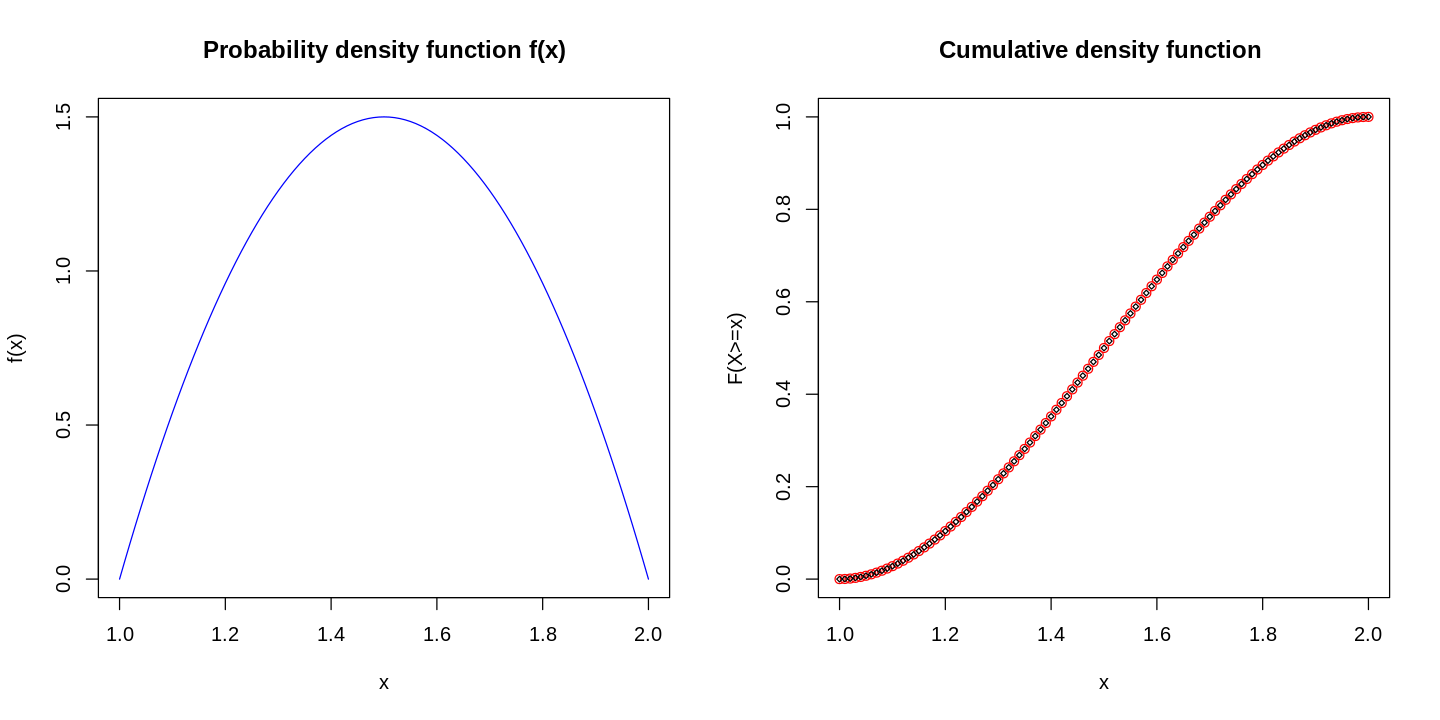

In [12]:
#probability density function
func<- function(x){6*(x-1)*(2-x)}
dfunc <- function(x){
                    ifelse(x>1 & x<2,
                        func(x),
                           0)
                     }

#cumulative density function
pfunc <-  function(x){
                    ifelse(x>1 & x<2,
                      -2*x^3+9*x^2-12*x+5,#it's what I get from the integration
                      ifelse(x>=2, 1,0)
                          )
                     }

#quantile function
qfunc <-function(x) {sapply(x,inverse(pfunc,lower=1,upper=2))} 


 # I sample from the inverse of the cdf -->quantile func
rfunc<-function(x){  random<-runif(x)
                     qfunc(random) 
                     }


#PLOTTT
x<-seq(1.0,2,0.01)

pdf<-dfunc(x)
cdf<-pfunc(x)
par(mfrow=c(1,2))   #to make two plot one near to the other
options(repr.plot.width=12, repr.plot.height=6) 
   
plot(x,pdf,xlab="x",ylab="f(x)",
    main="Probability density function f(x)",
       col="blue","l")

plot(y=cdf, x=x,xlab="x",ylab="F(X>=x)",
    main="Cumulative density function ",
       col="red",type='b')
points(x,cdf,cex=0.5,pch=23)

#### 3. Evaluate the probability that the student will finish the aptitude test in more than 75 minutes.  And that it will take between 90 and 120 minutes.

In [13]:
#75 minutes is 1.25 hours so :
cat("The probability that it will finish in more than 75 minutes is ",1-pfunc(1.25),"\n" )
cat("The probability that it will take between 90 and 120 minute ",1- pfunc(1.5),"\n" )
#90 minute is 1.5 hours and 120 is 2hour


The probability that it will finish in more than 75 minutes is  0.84375 
The probability that it will take between 90 and 120 minute  0.5 


## Exercise 6
The lifetime of tires sold by an used tires shop is $10^4 x$ km, where x is a random variable following the distribution function:

$$
g(x) =
  \begin{cases} \frac{2}{x^2}, & 1<x<2
             \\ 0, & otherwise
  \end{cases}
$$

Notes that f(x) is already normalized.
#### 1. Write the set of four R functions and plot the pdf and cdf, respectively.

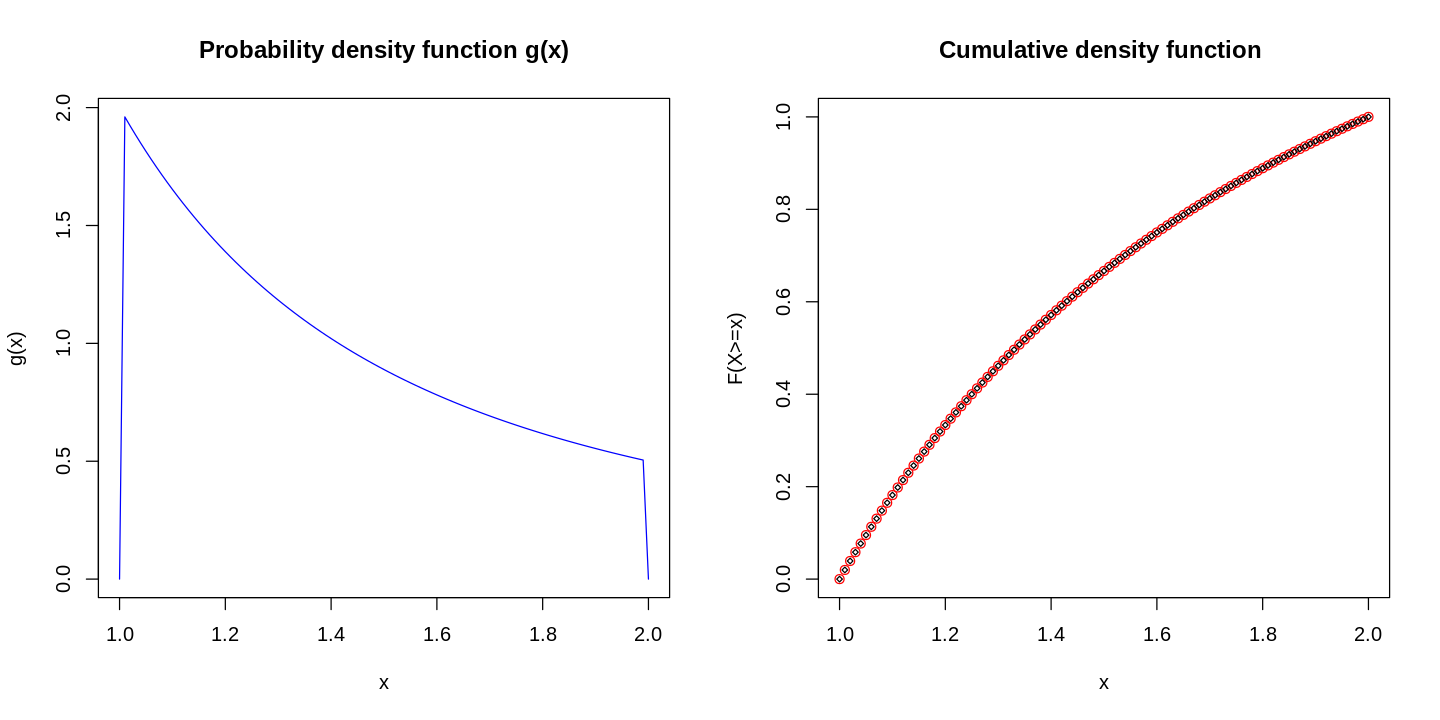

In [14]:

func2<- function(x){2./(x^2)}
#probability density function
dfunc2 <- function(x){
                    ifelse(x>1 & x<2,
                        func2(x),
                           0)
                     }

#cumulative density function
pfunc2 <-  function(x){
                    ifelse(x>1 & x<2,
                      2.0-2./x,#it's what I get from the integration
                      ifelse(x>=2, 1,0)
                          )
                     }

#quantile function
qfunc2 <-function(x) {sapply(x,inverse(pfunc2,lower=1,upper=2))} 



rfunc2<-function(x){ random<-runif(x)
                     qfunc2(random) 
                     }

#PLOTTT
par(mfrow=c(1,2))   #to make two plot one near to the other
options(repr.plot.width=12, repr.plot.height=6) 

x<-seq(1.0,2,0.01)

pdf<-dfunc2(x)
cdf<-pfunc2(x)
  
plot(x,pdf,xlab="x",ylab="g(x)",
    main="Probability density function g(x)",
       col="blue","l")

plot(y=cdf, x=x,xlab="x",ylab="F(X>=x)",
    main="Cumulative density function ",
       col="red",type='b')
points(x,cdf,cex=0.5,pch=23)


#### 2. Determine the probability that tires will last less than 15000 km
It is, in other words, the probability that x is smaller than 1.5 .

In [15]:
cat("The probability that x is smaller than 1.5 is :",pfunc2(1.5))

The probability that x is smaller than 1.5 is : 0.6666667

#### 3. Sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression $Var(X) =E[X^2]−E[X]^2$

In [16]:
tires_sample<-rfunc2(3000) #sample
tires2<-tires_sample*tires_sample

#simulated
mean_tires<-mean(tires_sample) 
var_tires<- mean(tires2)- mean_tires^2

#"exact"
real_mean<-integrate(function(x) dfunc2(x)*x, lower=1, upper=2)$value
real_tires2<-integrate(function(x) dfunc2(x)*x^2, lower=1, upper=2)$value
real_var<- real_tires2- real_mean^2

                       
                       
cat("The mean value from the simulated samples is: " ,mean_tires)
cat("\nThe variance from the simulated samples is: " ,var_tires)

cat("\nThe exact expectation value is: " ,real_mean)
cat("\nThe exact variance value is: " ,real_var)

                     

The mean value from the simulated samples is:  1.381013
The variance from the simulated samples is:  0.0772926
The exact expectation value is:  1.386294
The exact variance value is:  0.07818794